# Machine Learning

"Machine learning is the future." -- Google

"It's not magic. It's just a tool. But it's a really important tool." -- Google

## What is Machine Learning?

Machine learning is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data. 

Central to machine learning is the concept of making decision automatically from data, without the user specifying explicit rules how this decision should be made.

The second central concept is generalization. The goal of a machine learning algorithm is to predict on new, previously unseen data. We are not interested in marking an email as spam or not, that the human already labeled. Instead, we want to make the users life easier by making an automatic decision for new incoming mail.

Set of algorithms with tunable parameters that can learn and adjust the values of these parameters from previously seen data and generalising for predictions of new yet unseen data.

Pattern Recognition, Statistical Data Modelling, Learning from Data, Deep Learning, Computational Statistics

image recognition, bank fraud detection, hand-writing recognition, find similarities


- supervised learning - training from data with known results
- unsupervised learning - finding structure and patterns in data without labels

##### Regression

fitting a line
astronomy regression example, photometric redshift

non-trivial data analysis of large and/or multidimensional and/or complicated data sets

##### Classification

astronomy classification example, stars vs quasars, artefact finding

*The difference between a physicist and an astronomer: The physicist sees random 2D data and draws a curved line in it saying it’s the model that describes the data. The astronomer draws two parallel lines, saying these points belong to class A, these to class B and this is the class C.*

—- Andy Lawrence, private communication

##### Clustering

outliers

##### Principal Component Analysis

find similarities

In [6]:
%matplotlib inline
import seaborn; seaborn.set()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

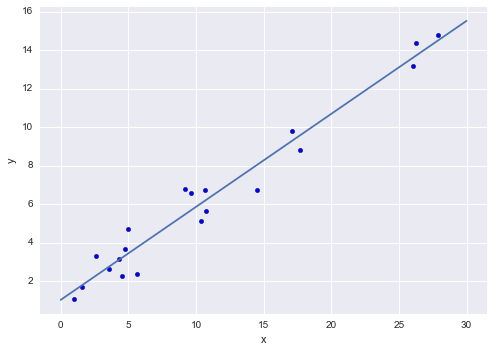

In [7]:
from fig_code import plot_linear_regression
plot_linear_regression()

 an example of fitting a model to data, such that the model can make generalizations about new data. The model has been learned from the training data, and can be used to predict the result of test data: here, we might be given an x-value, and the model would allow us to predict the y value.

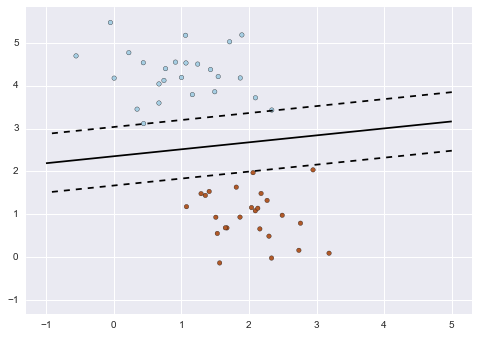

In [9]:
from fig_code import plot_sgd_separator
plot_sgd_separator()

difference between classification and regression is that regression predicts continous values, while classification categorical classes (not necessary in same metrics)

you don't tell the algorithm which words are probably spam, you let the algorithm decide automatically for you based on examples of spams and hams

By drawing this separating line, we have learned a model which can generalize to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now predict whether it's a blue or a red point.

This can be really powerful high dimensions N = 1000. If human could see in more than 3 dimensions, we would not need machine learning

In [ ]:
# %load fig_code/linear_regression.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def plot_linear_regression():
    a = 0.5
    b = 1.0

    # x from 0 to 10
    x = 30 * np.random.random(20)

    # y = a*x + b with noise
    y = a * x + b + np.random.normal(size=x.shape)

    # create a linear regression classifier
    clf = LinearRegression()
    clf.fit(x[:, None], y)

    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = clf.predict(x_new[:, None])

    # plot the results
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.axis('tight')


if __name__ == '__main__':
    plot_linear_regression()
    plt.show()


In [ ]:
# %load fig_code/sgd_separator.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        n_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([x1, x2])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()


workflow of ML

#### Essence of Machine Learning


- A pattern exists
- We cannot (or it is hard) to pin out analytically/mathematically
- We have data on it, enough data to learn

<img src="figures/ml-scheme.jpg" width="100%">

## Representation of data in scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be **[n_samples, n_features]**

### Features

- magnitudes in filters
- variability
- flare symmetry
- galaxy type
- RA, DEC
- 8x8 pixel representation of an object
- spectrum

data preparation

normalise, scale, centre, align, preprocesing, feature selection

curse of dimensionality

VC dimension, overfitting

#### data mining
- get data

#### preprocessing, feature selection
- transform data to scikit-learn friendly format
- select relevant feature
- normalise, scale, centre

#### choosing hypothesis set
- visualise
- sniff data but be care don't snoop the data

### train

### test


In [16]:
%install_ext https://raw.github.com/mgaitan/fortran_magic/master/fortranmagic.py

Installed fortranmagic.py. To use it, type:
  %load_ext fortranmagic


/Users/topinka/anaconda2/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


In [17]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [18]:
%%fortran
subroutine f1(x, y, z)
    real, intent(in) :: x,y
    real, intent(out) :: z

    z = sin(x+y)

end subroutine f1

RuntimeError: f2py failed, see output